In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

In [2]:
def calculate_growth(pandemic, countries) -> pd.DataFrame :
    growths = {}
    
    for c in countries:
        yrs = pandemics_years[pandemic]
        initial_gdp = gg.query("index=='{}'".format(c))[yrs[0]].values[0]
        final_gdp = gg.query("index=='{}'".format(c))[yrs[-1]].values[0]
        growth = (final_gdp - initial_gdp)/initial_gdp*100
    #     growths[p+' ({}-{}) '.format(yrs[0],yrs[0])] = [round(growth,3)]
        growths[c] = [round(growth,3)]
        
    data = pd.DataFrame(growths).transpose()
    data.columns = ['growth']
    
    return data

In [3]:
gdps =  pd.read_csv('PIB_PAISES.csv',skiprows=4)

In [4]:
gdps.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.585657e+10,1.780428e+10,2.000162e+10,2.056105e+10,2.048487e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.936297e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.057510e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.192696e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.186135e+10,1.302506e+10,1.510250e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.013387e+09,3.236544e+09,NaN


In [5]:
gdps.columns = [c.replace(' ', '_').upper() for c in gdps.columns]

In [6]:
largest_economies = ['United States','China','Japan','Germany','United Kingdom','France','Italy','Brazil','Canada']

In [7]:
pandemics = {'Hong Kong flu' : '1968-1970', #H3N2 virus
             'SARS' : '2002-2003', #SARS-CoV
             'Swine Flu' : '2009-2010' #H1N1 virus
             #'Corona Virus' : '2019-2020' #COVID-19
            }

In [8]:
gdps = gdps[gdps.COUNTRY_NAME.isin(largest_economies)]

In [9]:
gdps = gdps.reset_index(drop=True)

In [10]:
gdps.drop(columns=['2019'],inplace=True)

In [11]:
gdps.drop(columns=['COUNTRY_CODE','INDICATOR_NAME','INDICATOR_CODE'],inplace=True)

In [12]:
gdps

,COUNTRY_NAME,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Brazil,1.516557e+10,1.523685e+10,1.992629e+10,2.302148e+10,2.121189e+10,2.179004e+10,2.706272e+10,3.059183e+10,3.387588e+10,...,1.667020e+12,2.208872e+12,2.616201e+12,2.465189e+12,2.472806e+12,2.455994e+12,1.802214e+12,1.796275e+12,2.053595e+12,1.868626e+12
1,Canada,4.046172e+10,4.093495e+10,4.222745e+10,4.502999e+10,4.937752e+10,5.451518e+10,6.108838e+10,6.566866e+10,7.182981e+10,...,1.371153e+12,1.613543e+12,1.789141e+12,1.823967e+12,1.842018e+12,1.801480e+12,1.552900e+12,1.526706e+12,1.646867e+12,1.713342e+12
2,China,5.971647e+10,5.005687e+10,4.720936e+10,5.070680e+10,5.970834e+10,7.043627e+10,7.672029e+10,7.288163e+10,7.084654e+10,...,5.101702e+12,6.087165e+12,7.551500e+12,8.532231e+12,9.570406e+12,1.043853e+13,1.101554e+13,1.113795e+13,1.214349e+13,1.360815e+13
3,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.397791e+12,3.396354e+12,3.744409e+12,3.527345e+12,3.732743e+12,3.883920e+12,3.360550e+12,3.466790e+12,3.656749e+12,3.947620e+12
4,France,6.222548e+10,6.746164e+10,7.560753e+10,8.475920e+10,9.400785e+10,1.015372e+11,1.100459e+11,1.189730e+11,1.297854e+11,...,2.690222e+12,2.642610e+12,2.861408e+12,2.683825e+12,2.811078e+12,2.852166e+12,2.438208e+12,2.471286e+12,2.586285e+12,2.777535e+12
5,United Kingdom,7.323397e+10,7.774197e+10,8.124756e+10,8.656196e+10,9.440756e+10,1.018248e+11,1.085728e+11,1.131169e+11,1.077599e+11,...,2.410910e+12,2.475244e+12,2.659310e+12,2.704888e+12,2.786023e+12,3.063803e+12,2.928591e+12,2.694283e+12,2.666229e+12,2.855297e+12
6,Italy,4.038529e+10,4.484276e+10,5.038389e+10,5.771074e+10,6.317542e+10,6.797815e+10,7.365487e+10,8.113312e+10,8.794223e+10,...,2.191242e+12,2.134018e+12,2.291991e+12,2.087077e+12,2.141315e+12,2.159134e+12,1.835899e+12,1.875580e+12,1.956961e+12,2.083864e+12
7,Japan,4.430734e+10,5.350862e+10,6.072302e+10,6.949813e+10,8.174901e+10,9.095028e+10,1.056281e+11,1.237819e+11,1.466011e+11,...,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.850414e+12,4.389476e+12,4.926667e+12,4.859951e+12,4.971323e+12
8,United States,5.433000e+11,5.633000e+11,6.051000e+11,6.386000e+11,6.858000e+11,7.437000e+11,8.150000e+11,8.617000e+11,9.425000e+11,...,1.444893e+13,1.499205e+13,1.554258e+13,1.619701e+13,1.678485e+13,1.752175e+13,1.821930e+13,1.870719e+13,1.948539e+13,2.054434e+13


In [13]:
gg = gdps.copy()

In [14]:
gg.index = gg.COUNTRY_NAME

In [15]:
gg.drop(columns=['COUNTRY_NAME'],inplace=True)

In [16]:
gg

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
COUNTRY_NAME,,,,,,,,,,,,,,,,,,,,,
Brazil,1.516557e+10,1.523685e+10,1.992629e+10,2.302148e+10,2.121189e+10,2.179004e+10,2.706272e+10,3.059183e+10,3.387588e+10,3.745890e+10,...,1.667020e+12,2.208872e+12,2.616201e+12,2.465189e+12,2.472806e+12,2.455994e+12,1.802214e+12,1.796275e+12,2.053595e+12,1.868626e+12
Canada,4.046172e+10,4.093495e+10,4.222745e+10,4.502999e+10,4.937752e+10,5.451518e+10,6.108838e+10,6.566866e+10,7.182981e+10,7.914841e+10,...,1.371153e+12,1.613543e+12,1.789141e+12,1.823967e+12,1.842018e+12,1.801480e+12,1.552900e+12,1.526706e+12,1.646867e+12,1.713342e+12
China,5.971647e+10,5.005687e+10,4.720936e+10,5.070680e+10,5.970834e+10,7.043627e+10,7.672029e+10,7.288163e+10,7.084654e+10,7.970591e+10,...,5.101702e+12,6.087165e+12,7.551500e+12,8.532231e+12,9.570406e+12,1.043853e+13,1.101554e+13,1.113795e+13,1.214349e+13,1.360815e+13
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.397791e+12,3.396354e+12,3.744409e+12,3.527345e+12,3.732743e+12,3.883920e+12,3.360550e+12,3.466790e+12,3.656749e+12,3.947620e+12
France,6.222548e+10,6.746164e+10,7.560753e+10,8.475920e+10,9.400785e+10,1.015372e+11,1.100459e+11,1.189730e+11,1.297854e+11,1.419031e+11,...,2.690222e+12,2.642610e+12,2.861408e+12,2.683825e+12,2.811078e+12,2.852166e+12,2.438208e+12,2.471286e+12,2.586285e+12,2.777535e+12
United Kingdom,7.323397e+10,7.774197e+10,8.124756e+10,8.656196e+10,9.440756e+10,1.018248e+11,1.085728e+11,1.131169e+11,1.077599e+11,1.164647e+11,...,2.410910e+12,2.475244e+12,2.659310e+12,2.704888e+12,2.786023e+12,3.063803e+12,2.928591e+12,2.694283e+12,2.666229e+12,2.855297e+12
Italy,4.038529e+10,4.484276e+10,5.038389e+10,5.771074e+10,6.317542e+10,6.797815e+10,7.365487e+10,8.113312e+10,8.794223e+10,9.708508e+10,...,2.191242e+12,2.134018e+12,2.291991e+12,2.087077e+12,2.141315e+12,2.159134e+12,1.835899e+12,1.875580e+12,1.956961e+12,2.083864e+12
Japan,4.430734e+10,5.350862e+10,6.072302e+10,6.949813e+10,8.174901e+10,9.095028e+10,1.056281e+11,1.237819e+11,1.466011e+11,1.722042e+11,...,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.850414e+12,4.389476e+12,4.926667e+12,4.859951e+12,4.971323e+12
United States,5.433000e+11,5.633000e+11,6.051000e+11,6.386000e+11,6.858000e+11,7.437000e+11,8.150000e+11,8.617000e+11,9.425000e+11,1.019900e+12,...,1.444893e+13,1.499205e+13,1.554258e+13,1.619701e+13,1.678485e+13,1.752175e+13,1.821930e+13,1.870719e+13,1.948539e+13,2.054434e+13


In [17]:
pandemics_years={} 
for p,y in pandemics.items():
    pandemics_years[p] = [str(s) for s in range(int(y.split('-')[0]),int(y.split('-')[1])+1)]

In [18]:
pandemics_years

{'Hong Kong flu': ['1968', '1969', '1970'],
 'SARS': ['2002', '2003'],
 'Swine Flu': ['2009', '2010']}

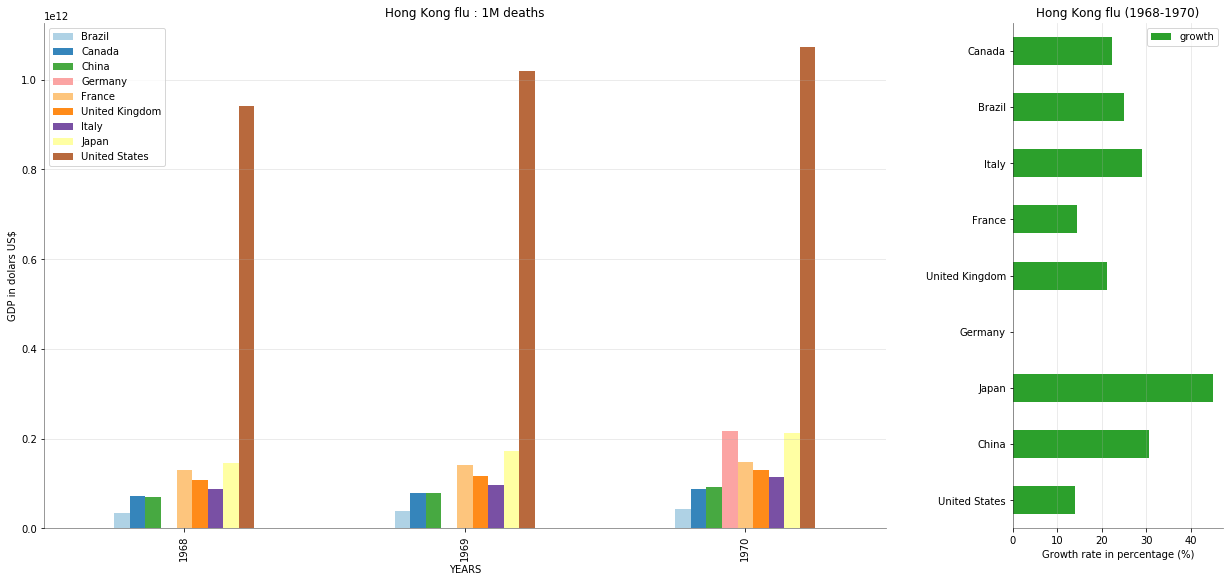

In [19]:
# Hong Kong flu
fig = plt.figure(figsize=(18,9))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
#-------------------------------------------
ax0 = plt.subplot(gs[0])   
gg[pandemics_years['Hong Kong flu']].transpose().plot(kind='bar', colormap='Paired',alpha=0.9, ax=ax0)

plt.xlabel("YEARS")
plt.ylabel("GDP in dolars US$")
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)  
plt.grid(axis='y', alpha=.3)
plt.title("Hong Kong flu : 1M deaths")
plt.legend();
#---------------------------------------------
ax1 = plt.subplot(gs[1])

calculate_growth('Hong Kong flu', largest_economies).plot(kind='barh', ax=ax1 , color='tab:green')
plt.xlabel("Growth rate in percentage (%)")
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)  
plt.grid(axis='x', alpha=.3)
plt.title("Hong Kong flu ({}-{})".format(pandemics_years["Hong Kong flu"][0],pandemics_years["Hong Kong flu"][-1]));

plt.tight_layout(pad=4)

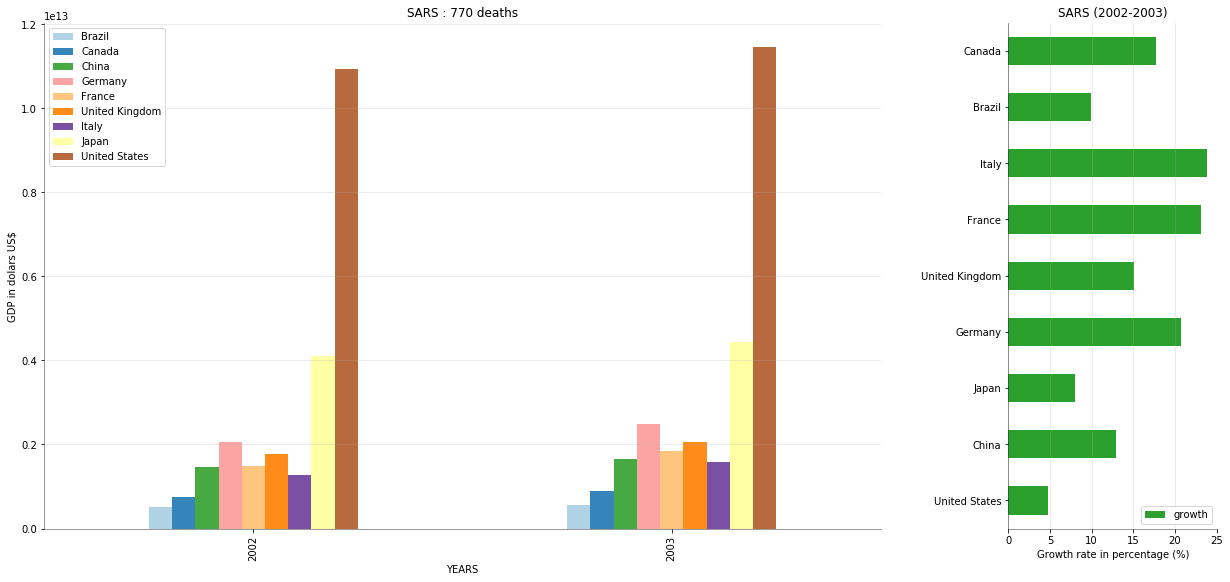

In [20]:
# SARS
fig = plt.figure(figsize=(18,9))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
#-------------------------------------------
ax0 = plt.subplot(gs[0])   
gg[pandemics_years['SARS']].transpose().plot(kind='bar', colormap='Paired',alpha=0.9, ax=ax0)

plt.xlabel("YEARS")
plt.ylabel("GDP in dolars US$")
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)  
plt.grid(axis='y', alpha=.3)
plt.title("SARS : 770 deaths")
plt.legend();
#---------------------------------------------
ax1 = plt.subplot(gs[1])

calculate_growth('SARS', largest_economies).plot(kind='barh', ax=ax1 , color='tab:green')
plt.xlabel("Growth rate in percentage (%)")
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)  
plt.grid(axis='x', alpha=.3)
plt.title("SARS ({}-{})".format(pandemics_years["SARS"][0],pandemics_years["SARS"][-1]));

plt.tight_layout(pad=4)

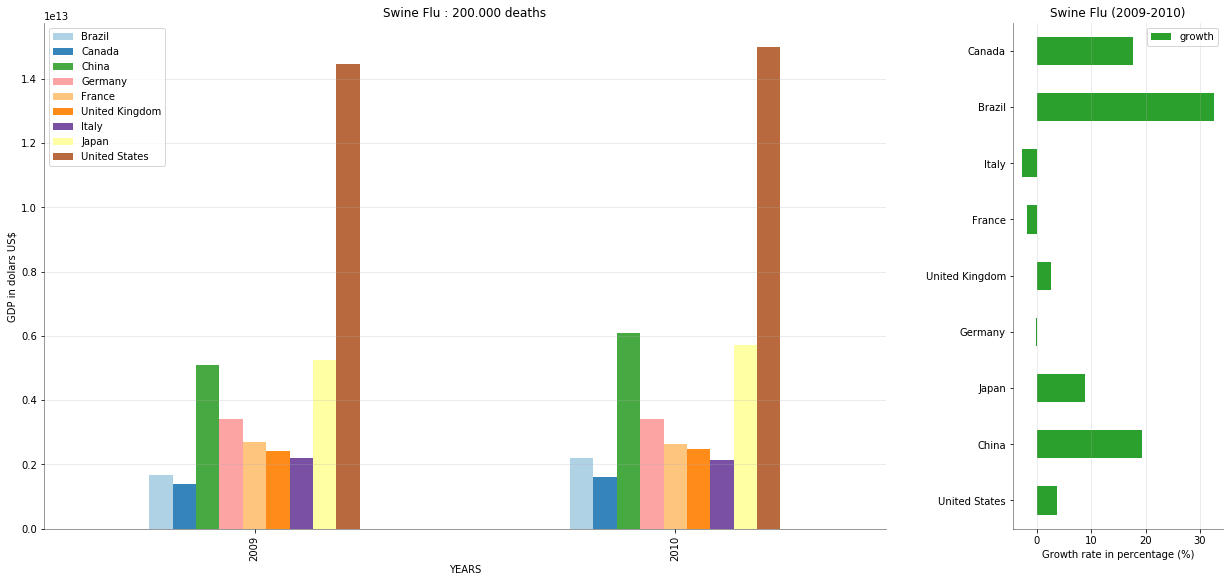

In [21]:
# Swine Flu
fig = plt.figure(figsize=(18,9))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
#-------------------------------------------
ax0 = plt.subplot(gs[0])   
gg[pandemics_years['Swine Flu']].transpose().plot(kind='bar', colormap='Paired',alpha=0.9, ax=ax0)

plt.xlabel("YEARS")
plt.ylabel("GDP in dolars US$")
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)  
plt.grid(axis='y', alpha=.3)
plt.title("Swine Flu : 200.000 deaths")
plt.legend();
#---------------------------------------------
ax1 = plt.subplot(gs[1])

calculate_growth('Swine Flu', largest_economies).plot(kind='barh', ax=ax1 , color='tab:green')
plt.xlabel("Growth rate in percentage (%)")
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["botdtom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)  
plt.grid(axis='x', alpha=.3)
plt.title("Swine Flu ({}-{})".format(pandemics_years["Swine Flu"][0],pandemics_years["Swine Flu"][-1]));

plt.tight_layout(pad=4)

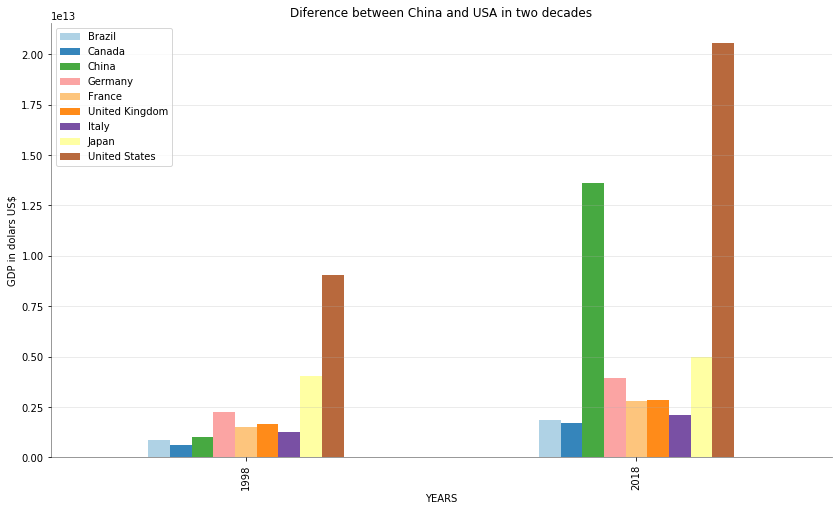

In [23]:
#today
gg[['1998','2018']].transpose().plot(kind='bar',figsize=(14,8), colormap='Paired',alpha=0.9)
plt.xlabel("YEARS")
plt.ylabel("GDP in dolars US$")

plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)  
plt.grid(axis='y', alpha=.3)
plt.title("Diference between China and USA in two decades")
plt.legend();